In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats

#Чтение и предобработка данных

In [2]:
df = pd.read_csv('train - train.csv')

df


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


Поскольку столбцы Order Date и Sales имеют тип object, необходимо их преобразовать для дальнейшего анализа

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Sales'] = df['Sales'].str.replace(',','.')

df['Sales'] = df['Sales'].astype(float)

C:\Users\supte\AppData\Local\Temp\ipykernel_3728\62921461.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


Посмотрим на распределние данных по каждой из групп:

In [6]:
class_counts = df['Class'].value_counts()
region_counts = df['Region'].value_counts()
sub_category_counts = df['Sub-Category'].value_counts()

print("Class counts:\n", class_counts)
print("\nRegion counts:\n", region_counts)
print("\nSub-Category counts:\n", sub_category_counts)

Class counts:
 Class
Стандарт        5859
Второй класс    1902
Первый класс    1501
Same Day         538
Name: count, dtype: int64

Region counts:
 Region
Калиниград     3140
Владивосток    2785
Урал           2277
Москва         1598
Name: count, dtype: int64

Sub-Category counts:
 Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


#Задание 1

**а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?**

**б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?**

**в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?**

 Подгруппа – Sub-Category

 Дата – Order_date

 Сделать вывод на основе полученных результатов.


Для простоты напишем функцию, которая будет выбирать соответсвующий интервал данных в зависимости от заданного года

In [7]:
def cut_by_year(data, date_column, years):
  mask = (data[date_column].dt.year.isin(years))
  new_data = data[mask]
  return new_data

In [8]:
#Задание 1.А
top_sub_cat_all = df['Sub-Category'].value_counts().head(4)

#Задание 1.Б
df_two_year = cut_by_year(df, 'Order Date', (2017, 2018))
top_sub_cat_two_years = df_two_year['Sub-Category'].value_counts().head(4)

#Задание 1.В
df_one_year = cut_by_year(df, 'Order Date', (2018, 2018))
top_sub_cat_one_years =  df_one_year['Sub-Category'].value_counts().head(4)

Посчитаем доли отоносительно трех диапазонов

In [9]:
# Подсчет доли 2017-2018 от всей выборки
share_two_year = len(df_two_year) / len(df)

# Подсчет доли 2018 от всей выборки
share_one_year = len(df_one_year) / len(df)

# Подсчет доли 2018 от 2017-2018
share_one_year_of_two_year = len(df_one_year) / len(df_two_year)

print("Доля продаж за 2017-2018 года от всей выборки:", round(share_two_year, 2))
print("Доля продаж за 2018 год от всей выборки:", round(share_one_year, 2))
print("Доля продаж за 2018 год от продаж за 2017-2018 года", round(share_one_year_of_two_year, 2))

Доля продаж за 2017-2018 года от всей выборки: 0.59
Доля продаж за 2018 год от всей выборки: 0.33
Доля продаж за 2018 год от продаж за 2017-2018 года 0.56


Теперь посчитаем прирост по каждой Sub-Category за 2018 год, относительно 2017 года

In [10]:
df_2017 = cut_by_year(df, 'Order Date', [2017])
df_2018 = cut_by_year(df, 'Order Date', [2018])


sales_2017 = df_2017.groupby('Sub-Category')['Sales'].sum()
sales_2018 = df_2018.groupby('Sub-Category')['Sales'].sum()

total_sales_2017 = sales_2017.sum()
total_sales_2018 = sales_2018.sum()
total_sales_growth = (total_sales_2018 - total_sales_2017) / total_sales_2017 * 100

sales_growth = (sales_2018 - sales_2017) / sales_2017 * 100
sales_growth = sales_growth.reset_index()
sales_growth.columns = ['Sub-Category', 'Sales Growth']

print("Суммарные продажи за 2017 год:", sales_2017)
print("Суммарные продажи за 2018 год:", sales_2018)
print("Прирост продаж за 2018 год относительно 2017 года:", round(sales_growth, 2), "%")
print("Общий прирост продаж за 2018 год относительно 2017 года:", round(total_sales_growth, 2), "%")

Суммарные продажи за 2017 год: Sub-Category
Accessories    4309804.034
Appliances     2601819.825
Art            4167941.732
Binders        8900516.213
Bookcases      1266999.518
Chairs         3769978.540
Copiers         373212.980
Envelopes      1559704.444
Fasteners      1329181.620
Furnishings    5276516.226
Labels         2400298.736
Machines        720977.538
Paper          8495395.240
Phones         5300246.910
Storage        4990441.331
Supplies       1372525.636
Tables         1951469.082
Name: Sales, dtype: float64
Суммарные продажи за 2018 год: Sub-Category
Accessories    5.943291e+06
Appliances     3.486188e+06
Art            6.083655e+06
Binders        1.143153e+07
Bookcases      1.751299e+06
Chairs         4.364478e+06
Copiers        4.702610e+05
Envelopes      1.548950e+06
Fasteners      1.376410e+06
Furnishings    7.317576e+06
Labels         2.813407e+06
Machines       7.066891e+05
Paper          1.061665e+07
Phones         6.730458e+06
Storage        6.292320e+06
Suppl

Визуализируем полученные данные

In [11]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['2015-2018', '2017-2018', '2018'])


fig.add_trace(
    go.Bar(x=top_sub_cat_all.index, y=top_sub_cat_all.values, name='2015-2018'),
    row=1, col=1
)


fig.add_trace(
    go.Bar(x=top_sub_cat_two_years.index, y=top_sub_cat_two_years.values, name='2017-2018'),
    row=1, col=2
)


fig.add_trace(
    go.Bar(x=top_sub_cat_one_years.index, y=top_sub_cat_one_years.values, name='2018'),
    row=1, col=3
)

fig.update_layout(title_text='Топ подкатегорий по продажам по годам', showlegend=False)
fig.show()

Вариант графика с использованием matplotlib и seaborn

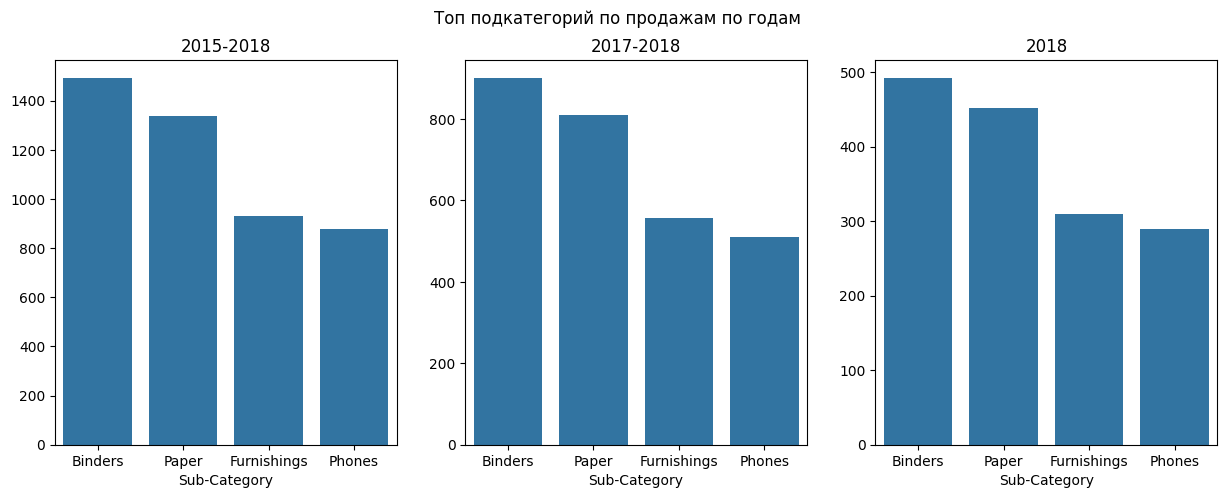

In [26]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Топ подкатегорий по продажам по годам')

sns.barplot(x=top_sub_cat_all.index, y=top_sub_cat_all.values, ax=axes[0])
axes[0].set_title('2015-2018')

sns.barplot(x=top_sub_cat_two_years.index, y=top_sub_cat_two_years.values, ax=axes[1])
axes[1].set_title('2017-2018')

sns.barplot(x=top_sub_cat_one_years.index, y=top_sub_cat_one_years.values, ax=axes[2])
axes[2].set_title('2018')

# Отображение графика
plt.show()

Визуализируем прирос по каждой подкатегории в 2018 году относительно 2017 года

In [13]:
fig = px.bar(sales_growth, x='Sub-Category', y='Sales Growth',
             title='Прирост продаж по категориям за 2018 год относительно 2017 года',
             labels={'Sales Growth': 'Прирост продаж (%)'},
             color='Sales Growth',
             color_continuous_scale='Blues')

fig.update_layout(xaxis_title='Категория', yaxis_title='Прирост продаж (%)')
fig.show()

Вариант графика с использованием matplotlib и seaborn

C:\Users\supte\AppData\Local\Temp\ipykernel_3728\3327522024.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




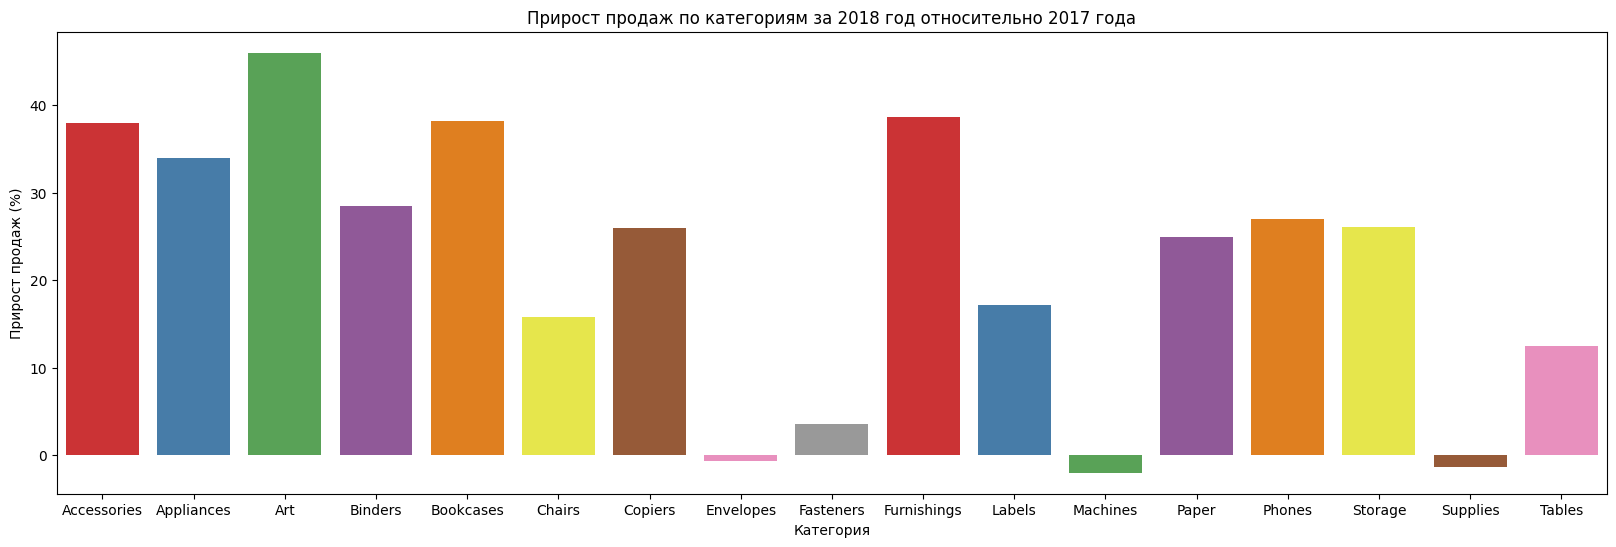

In [31]:
plt.figure(figsize=(20, 6))
barplot = sns.barplot(data=sales_growth, x='Sub-Category', y='Sales Growth', palette='Set1')

barplot.set_title('Прирост продаж по категориям за 2018 год относительно 2017 года')
barplot.set_xlabel('Категория')
barplot.set_ylabel('Прирост продаж (%)')

plt.show()

**ВЫВОД**

По полученным данным можно сделать вывод, что по всем периодам топ 4 категории по количеству продаж являются Binders, Paper, Furnishings, Phones. По общему объему продаж в преиод с 2017 по 2018 года было продано около 60% от всей выборки, за 2018 год было продано больше половины продуктов, что может говорить об общем росте продаж компании. Общий прирост компании по сумме продаж за 2018 год составил 26,7%.


#Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


Поскольку данные имеют характерное разделение по признакам, постром barplot по каждому уникальному значению в Sub-Category:

In [14]:
fig_box = px.box(df, x=df['Sub-Category'], y=df['Sales'], color='Sub-Category', title='Boxplot of Sales by Sub-Category')


fig_box.show()

Вариант графика с использованием matplotlib и seaborn

C:\Users\supte\AppData\Local\Temp\ipykernel_3728\3314398617.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




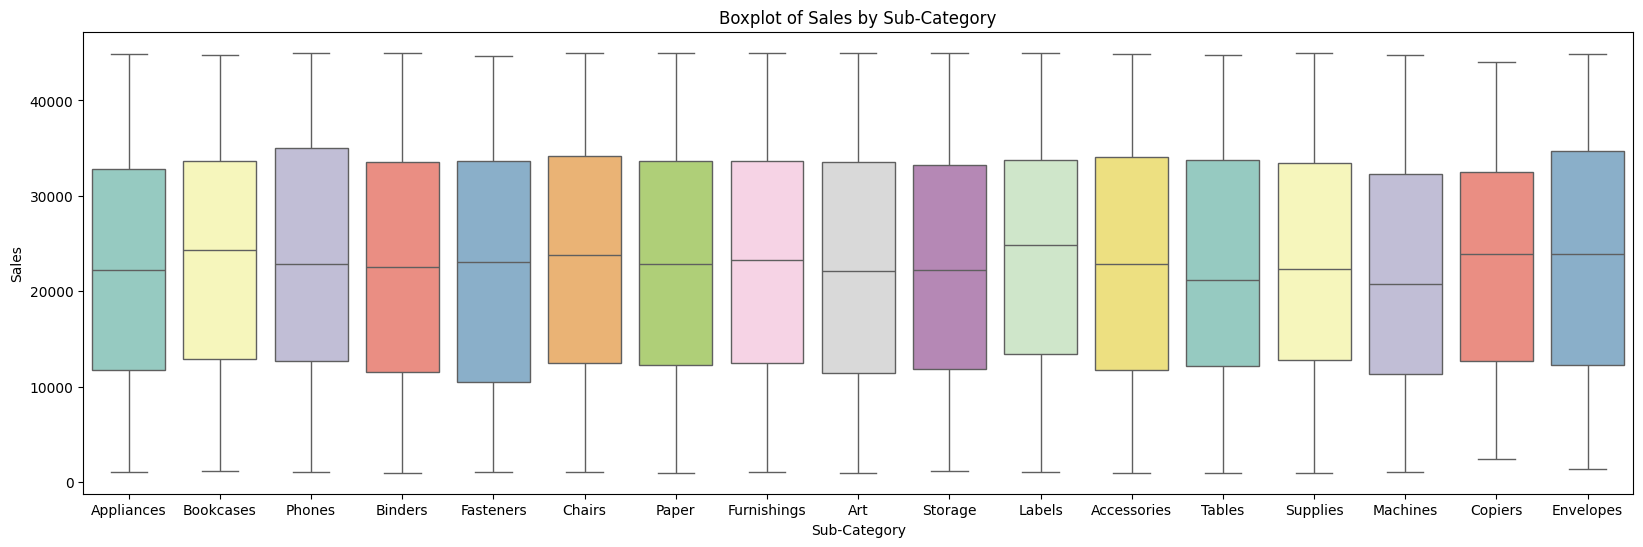

In [35]:
plt.figure(figsize=(20, 6))
boxplot = sns.boxplot(data=df, x='Sub-Category', y='Sales', palette='Set3')

boxplot.set_title('Boxplot of Sales by Sub-Category')

plt.show()

Рисунок показывает, что по каждой категории данные распределены нормально и не имеют больших отклонений, что дает возможность предположить, что по каждой Sub-Category значение Sales может иметь нормальное распределением.

Реализуем проверку данных на наличие аномалий через правило трех сигм и посмотрим на результат:

In [15]:
df_sub_cat = df['Sub-Category'].unique()

def three_sigma_rule(sub_df):
    sales_mean = round(sub_df['Sales'].mean(), 3)
    sales_std = round(sub_df['Sales'].std(), 3)
    sales_3sigma_max = sales_mean + 3 * sales_std
    sales_3sigma_min = sales_mean - 3 * sales_std
    within_three_sigma = sub_df[(sub_df['Sales'] >= sales_3sigma_min) & (sub_df['Sales'] <= sales_3sigma_max)]
    percentage_within_three_sigma = len(within_three_sigma) / len(sub_df) * 100

    return pd.Series({
        'Среднее значение продаж': sales_mean,
        'Стандартное отклонение продаж': sales_std,
        'Максимальное значение для трёх сигм': sales_3sigma_max,
        'Минимальное значение для трёх сигм': sales_3sigma_min,
        'Доля данных в пределах трёх сигм': percentage_within_three_sigma
    })

# Применение функции к каждой подкатегории
result = df.groupby('Sub-Category').apply(three_sigma_rule).reset_index()

result

C:\Users\supte\AppData\Local\Temp\ipykernel_3728\1065174224.py:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Sub-Category,Среднее значение продаж,Стандартное отклонение продаж,Максимальное значение для трёх сигм,Минимальное значение для трёх сигм,Доля данных в пределах трёх сигм
0,Accessories,22850.460,12750.349,61101.507,-15400.587,100.0
1,Appliances,22579.912,12663.538,60570.526,-15410.702,100.0
2,Art,22716.514,12585.959,60474.391,-15041.363,100.0
3,Binders,22729.205,12648.437,60674.516,-15216.106,100.0
4,Bookcases,23686.751,11970.653,59598.710,-12225.208,100.0
5,Chairs,23271.306,12319.924,60231.078,-13688.466,100.0
6,Copiers,23374.990,12674.199,61397.587,-14647.607,100.0
7,Envelopes,23409.891,12642.668,61337.895,-14518.113,100.0
8,Fasteners,22146.975,13343.590,62177.745,-17883.795,100.0
9,Furnishings,23163.336,12406.285,60382.191,-14055.519,100.0


Правило трех сигм показывает, что значение Sales, сгрупированное по Sub-Category не имеет аномалий и имеет нормальное распределение, поскольку в интервал трех сигм входит 100% имеющихся данных.

Построим гистограммы распределения по каждому Sub-Category, а также отобразим линию плотности:

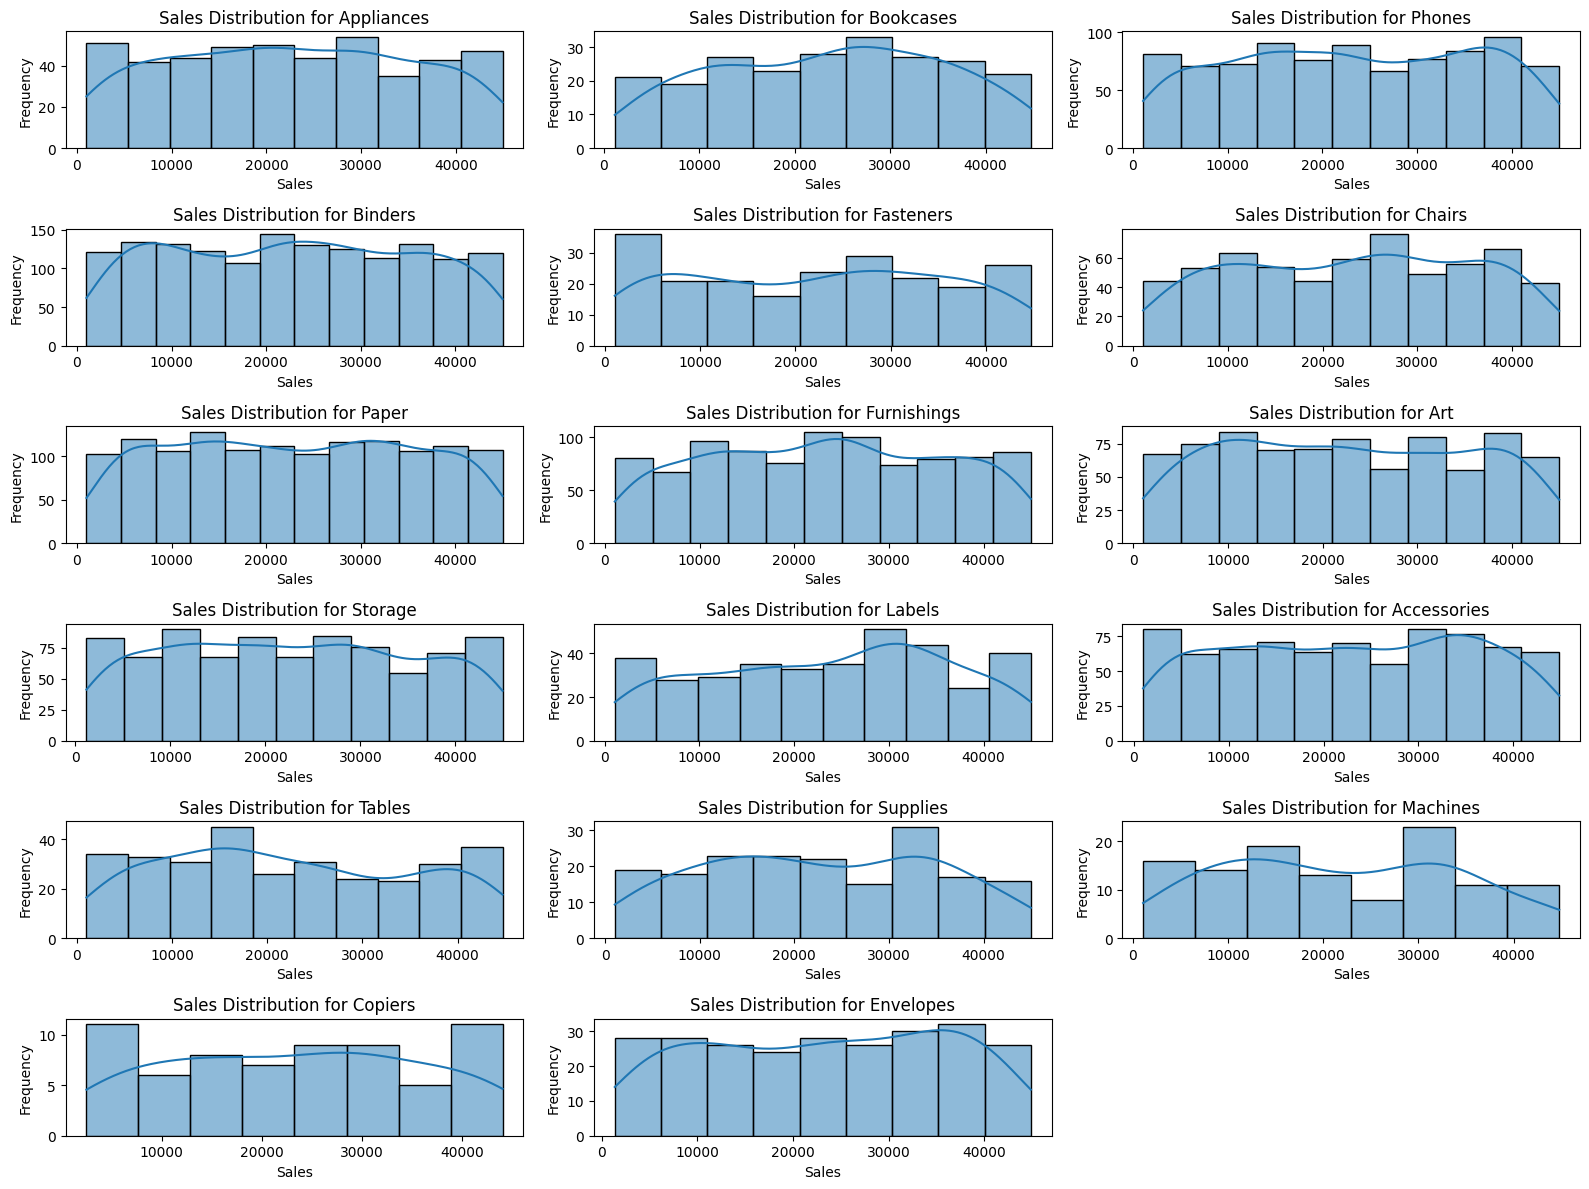

In [16]:
plt.figure(figsize=(16, 12))

for i, sub_cat in enumerate(df_sub_cat):
    plt.subplot(len(df_sub_cat) // 3 + 1, 3, i + 1)
    sub_cat_data = df[df['Sub-Category'] == sub_cat]['Sales']
    sns.histplot(sub_cat_data, kde=True)
    plt.title(f'Sales Distribution for {sub_cat}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Рисунки показывает, что больших выбросов по данным нет, однако попробуем убрать значения, выходящие за пределы линии KDE по каждой категории:

Пиковое значение KDE для Appliances: 20803.096062222026
Пиковое значение KDE для Bookcases: 20803.096062222026
Пиковое значение KDE для Phones: 20803.096062222026
Пиковое значение KDE для Binders: 20803.096062222026
Пиковое значение KDE для Fasteners: 20803.096062222026
Пиковое значение KDE для Chairs: 20803.096062222026
Пиковое значение KDE для Paper: 20803.096062222026
Пиковое значение KDE для Furnishings: 20803.096062222026
Пиковое значение KDE для Art: 20803.096062222026
Пиковое значение KDE для Storage: 20803.096062222026
Пиковое значение KDE для Labels: 20803.096062222026
Пиковое значение KDE для Accessories: 20803.096062222026
Пиковое значение KDE для Tables: 20803.096062222026
Пиковое значение KDE для Supplies: 20803.096062222026
Пиковое значение KDE для Machines: 20803.096062222026
Пиковое значение KDE для Copiers: 20803.096062222026
Пиковое значение KDE для Envelopes: 20803.096062222026


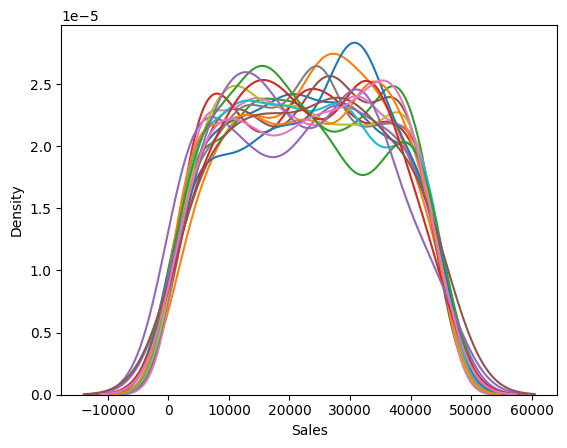

In [17]:
new_df = pd.DataFrame()

for sub_cat in df['Sub-Category'].unique():
    sub_cat_data = df[df['Sub-Category'] == sub_cat]['Sales']
    kde = sns.kdeplot(sub_cat_data, label=sub_cat, legend=True).get_lines()[0].get_data()
    kde_x = kde[0]
    kde_y = kde[1]
    threshold = kde_x[np.argmax(kde_y)]
    filtered_data = df[(df['Sub-Category'] == sub_cat) & (df['Sales'] <= threshold)]
    new_df = pd.concat([new_df, filtered_data])

    # Вывод пикового значения KDE (мажоритарная черта)
    peak_value = kde_x[np.argmax(kde_y)]
    print(f'Пиковое значение KDE для {sub_cat}: {peak_value}')


In [18]:
new_df

,ID,Order Date,Class,Region,Sub-Category,Sales
67,405,2018-12-24,Стандарт,Владивосток,Appliances,4951.841
86,3546,2018-12-23,Второй класс,Урал,Appliances,5808.618
163,8848,2018-12-18,Стандарт,Владивосток,Appliances,14280.760
248,2337,2018-12-10,Same Day,Владивосток,Appliances,6319.906
334,674,2018-12-05,Первый класс,Урал,Appliances,12935.220
...,...,...,...,...,...,...
9183,2997,2015-06-21,Стандарт,Владивосток,Envelopes,10384.140
9255,6323,2015-06-03,Второй класс,Урал,Envelopes,6886.931
9353,5197,2015-05-10,Стандарт,Калиниград,Envelopes,11504.150
9759,5465,2015-01-19,Первый класс,Калиниград,Envelopes,6534.445


Также попробуем проверить распределение с помощью модифицировнного Z-score.

Формулы:

Медиана продаж (Median of Sales):
$$ \text{Median} = \text{median}(X) $$

Медианное абсолютное отклонение (MAD - Median Absolute Deviation):
$$ \text{MAD} = \text{median}(|X - \text{Median}|) $$

Модифицированный Z-Score (Modified Z-Score):
$$ \text{Modified Z-Score} = 0.6745 \times \frac{(X - \text{Median})}{\text{MAD}} $$
​

In [19]:
def modified_z_score(sub_df):
    sales_median = round(sub_df['Sales'].median(), 3)
    mad = round(np.median(np.abs(sub_df['Sales'] - sales_median)), 3)
    sub_df['Modified Z-Score'] = 0.6745 * (sub_df['Sales'] - sales_median) / mad
    anomalies = sub_df[np.abs(sub_df['Modified Z-Score']) > 3.5]
    percentage_anomalies = len(anomalies) / len(sub_df) * 100

    return pd.Series({
        'Медиана продаж': sales_median,
        'MAD': mad,
        'Доля аномалий': percentage_anomalies
    })

result = df.groupby('Sub-Category').apply(modified_z_score).reset_index()

result

C:\Users\supte\AppData\Local\Temp\ipykernel_3728\498880220.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Sub-Category,Медиана продаж,MAD,Доля аномалий
0,Accessories,22839.210,11150.065,0.0
1,Appliances,22251.810,10456.560,0.0
2,Art,22173.510,10930.600,0.0
3,Binders,22551.955,10949.545,0.0
4,Bookcases,24383.490,10488.690,0.0
5,Chairs,23831.500,10797.980,0.0
6,Copiers,23944.560,10713.845,0.0
7,Envelopes,23956.990,11240.710,0.0
8,Fasteners,23032.550,11848.690,0.0
9,Furnishings,23286.620,10546.790,0.0


Резульаты показывают, что при проверке наличия аномалий с помощью модифицированного Z-Score, аномалий не обнаружено

**ВЫВОД**

Проведенный анализ показывает, что по правилу трех сигм и Z-score mod аномалий не выявлено. Однако гистограмма распределения показывает, что есть незначительные выбросы, которые были убраны в новом DataFrame (new_df). Мажоритарной чертой в этом случае будет пиковое значение кривой плотности(KDE).

#Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


Для начала разобъем данные по продажам на 3 группы (Малеькие, Средние и Большие):

In [20]:
bins = np.linspace(df['Sales'].min(), df['Sales'].max(), num=4)
labels = ['Маленькие продажи', 'Средние продажи', 'Высокие продажи']
df['Sale_group'] = pd.cut(df['Sales'], bins=bins, labels=labels, include_lowest=True)



Затем необходимо сделать группировку по региону и группе продаж

In [21]:
grouped = df.groupby(['Region', 'Sale_group']).agg({
    'Sales': ['sum', 'mean', 'count']
}).reset_index()

# Задаем новые значения столбцов
grouped.columns = ['Region', 'Sale_group', 'Total_Sales', 'Average_Sales', 'Count']

# Сортировка данных по Total_Sales
sorted_grouped = grouped.sort_values(by=['Total_Sales', 'Sale_group'], ascending=[False, False])

# Форматирование значений в столбце Total_Sales для удобства чтения
sorted_grouped['Total_Sales'] = sorted_grouped['Total_Sales'].apply(lambda x: f'{x:,.2f}')



C:\Users\supte\AppData\Local\Temp\ipykernel_3728\2669616415.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Выведем основные тенденции:

In [22]:
# Определение наиболее прибыльной группы
most_profitable_group = sorted_grouped.loc[sorted_grouped['Total_Sales'].idxmax()]

print("Основные тенденции и паттерны:")
print(sorted_grouped)
print("\nНаиболее прибыльная группа:")
print(most_profitable_group)

Основные тенденции и паттерны:
         Region         Sale_group    Total_Sales  Average_Sales  Count
5    Калиниград    Высокие продажи  37,360,269.02   37699.565106    991
2   Владивосток    Высокие продажи  35,449,521.71   37552.459439    944
11         Урал    Высокие продажи  27,835,063.91   37412.720309    744
4    Калиниград    Средние продажи  25,680,862.64   23135.912288   1110
1   Владивосток    Средние продажи  20,641,092.62   23088.470492    894
8        Москва    Высокие продажи  19,955,694.07   37652.252962    530
10         Урал    Средние продажи  17,588,614.03   22961.637115    766
7        Москва    Средние продажи  12,648,114.08   23080.500146    548
3    Калиниград  Маленькие продажи   8,889,168.06    8555.503429   1039
0   Владивосток  Маленькие продажи   7,862,072.55    8302.082951    947
9          Урал  Маленькие продажи   6,434,909.76    8389.712850    767
6        Москва  Маленькие продажи   4,287,843.36    8245.852623    520

Наиболее прибыльная группа:
Regi

Визуализируем полученные данные:

In [23]:
fig = px.bar(grouped, x='Region', y='Count', color='Sale_group',
              title='Количество продаж по регионам и группам продаж')
fig.show()

Вариант графика с использованием matplotlib и seaborn

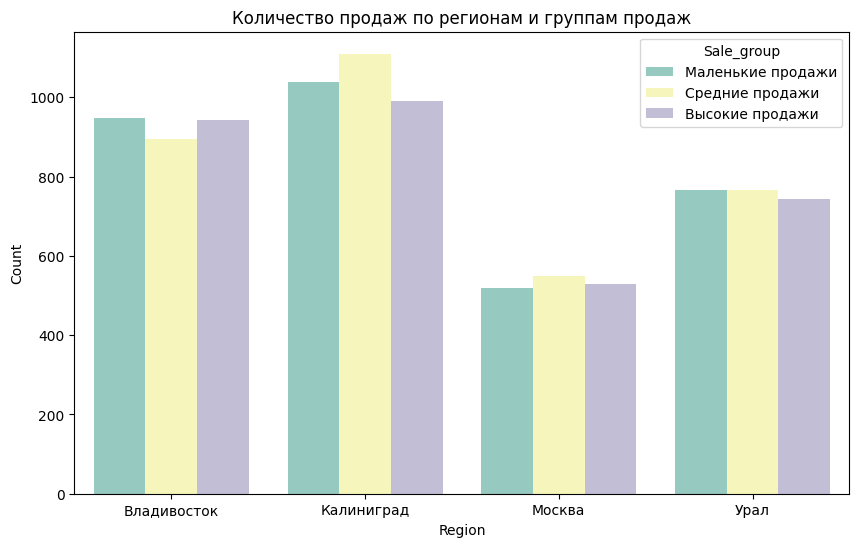

In [38]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=grouped, x='Region', y='Count', hue='Sale_group', palette='Set3')

barplot.set_title('Количество продаж по регионам и группам продаж')

plt.show()

Также можно посмотреть на доли продаж по регионам:

In [24]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

fig = px.pie(region_sales, values='Sales', names='Region',
             title='Доли от всех продаж по регионам',
             labels={'Sales': 'Суммарные продажи', 'Region': 'Регион'})

fig.show()

Вариант графика с использованием matplotlib и seaborn

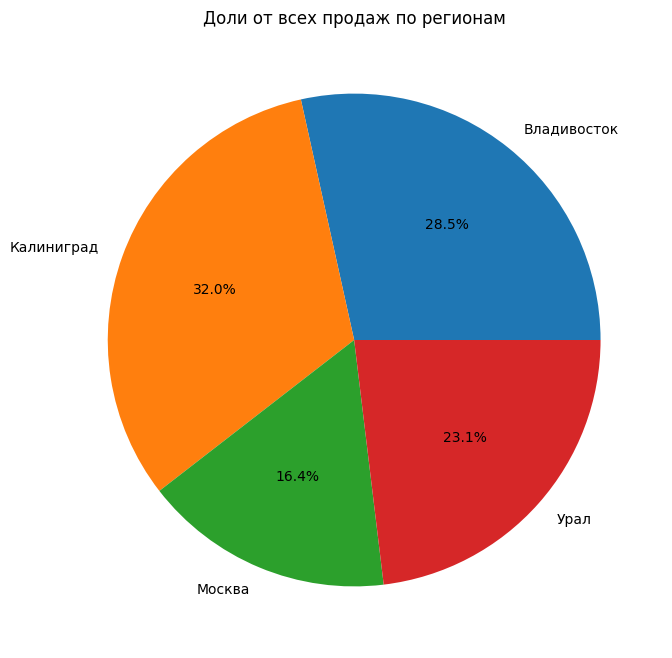

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%')

plt.title('Доли от всех продаж по регионам')

plt.show()

**ВЫВОД**

Проведя анализ по группам регионов и продаж, можно увидеть, что Калининград занимает лидирующие позици по всем трем группам и имеет наибольшую долю по всем продажам, равную 32%.

Также можно сделать вывод, что продажи по Москве значительно ниже остальных регионов, поскольку группа "Высокие продажи" по Москве меньше средних продаж в таких регионах, как Калиниград и Владивосток.